<a href="https://colab.research.google.com/github/agustinLapi/Fractales/blob/main/Fractales_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
#!ls "/content/drive/My Drive"

#a = iio.imread('binary_dots.png')
#print(a)

#def box_counting(img):
#    h,w = img.shape

 #   return

Mounted at /content/drive


In [5]:
a= iio.imread( "/content/drive/My Drive/binary_dots.png")[:,:,0]//255
print(a)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


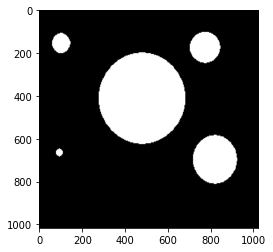

In [6]:
plt.imshow(a, 'gray')
plt.show()

In [7]:
import math
def box_counting(img):
  h,w = img.shape
  h_l = math.log2(h)
  w_l = math.log2(w)
  if h_l > w_l:
      my_vec = np.arange(int(math.floor(w_l)))
  else:      
      my_vec = np.arange(int(math.floor(h_l)))
  Reg = 2**my_vec
  #print(Reg)
  box_counts= []
  media = []
  for kk in Reg:
    ss_w = w//kk
    ss_h = h//kk
    aux = 0
    if kk <4 :
      for LL in range(kk):
        for ii in range(0, w, ss_h):
          for jj in range(0, h, ss_w):
            if np.any(img[ii+LL:ii+ss_h+LL, jj+LL:jj+ss_w+LL] == 1):
              aux = aux+1
    else :
      for LL in range(4):
        for ii in range(0, w, ss_h):
          for jj in range(0, h, ss_w):
            if np.any(img[ii+LL:ii+ss_h+LL, jj+LL:jj+ss_w+LL] == 1):
              aux = aux+1

    box_counts.append(aux/kk)
  #Now running the whole image once again to reach pixel count
  if ((h_l-math.floor(h_l)!=0) | (w_l-math.floor(w_l)!=0)):
    aux =0
    for ii in range(h):
      for jj in range(w):
        if np.any(img[ii, jj] == 1):
          aux = aux+1
    box_counts.append(aux)
  #my_vec.append(math.log2(h))
  #Reg.append(2**math.log2(h))
  print("Reg = ", Reg, 2**math.log2(h))
  my_vec_2 =[]
  for i in my_vec:
    my_vec_2.append(math.log2(1/i))
  my_vec_2.append(math.log2(1/math.log2(h)))
  print("log(1/Reg)", my_vec_2)
  print("media = ", box_counts)
  log_media = []
  for i in box_counts:
    log_media.append(math.log2(i))
  #log_media = math.log2(box_counts)
  print("log(media) = ",log_media)
  return 

In [8]:
box_counting(a)

Reg =  [  1   2   4   8  16  32  64 128 256] 1015.9999999999998
log(1/Reg) [inf, 0.0, -1.0, -1.5849625007211563, -2.0, -2.321928094887362, -2.584962500721156, -2.807354922057604, -3.0, -3.3202947159752965]
media =  [1.0, 4.0, 12.0, 15.75, 19.5625, 32.15625, 57.84375, 114.8046875, 257.8203125, 193437]
log(media) =  [0.0, 2.0, 3.584962500721156, 3.9772799234999163, 4.290018846932618, 5.007027266893968, 5.854089179870574, 6.843037738538695, 8.0102221213897, 17.561504249660242]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in long_scalars
